In [1]:
from PyPDF2 import PdfReader

In [2]:
def pdf_docs(pdf_doc):

    text_list=[]

    pdf_reader= PdfReader(pdf_doc)
    for page in pdf_reader.pages:
        text_list.append(page.extract_text())
    return text_list

In [3]:
data=pdf_docs(r'C:\Users\DELL\Documents\GEN-AI-LABS\Storing_pdfs_in_vectordatabase\microsoft_annual_report_2022.pdf')
data

['   \n',
 '',
 '1 Dear shareholders, colleagues, customers, and partners:  \nWe are living through a period of historic economic, societal, and geopolitical change. The world in 2022 looks nothing like \nthe world in 2019. As I write this, inflation is at a 40 -year high, supply chains are stretched, and the war in Ukraine is \nongoing. At the same time, we are entering a technological era with the potential to power awesome advancements \nacross every sector of our economy and society. As the world’s largest software company, this places us at a historic \nintersection of opportunity and responsibility to the world around us.  \nOur mission to empower every person and every organization on the planet to achieve more has never been more \nurgent or more necessary. For all the uncertainty in the world, one thing is clear: People and organizations in every \nindustry are increasingly looking to digital technology to overcome today’s challenges and emerge stronger. And no \ncompany is be

In [4]:
# Filter the empty strings
pdf_texts = [text for text in data if text]

In [5]:
len(pdf_texts)

92

In [6]:
page_number_id=list(range(1,93))
print(page_number_id)
page_number_id = [str(i) for i in page_number_id]
print(page_number_id)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92']


In [7]:
import chromadb
import chromadb.utils.embedding_functions as embedding_functions

openai_ef= embedding_functions.OpenAIEmbeddingFunction(api_key='',model_name="text-embedding-ada-002")

In [8]:
cindex= chromadb.PersistentClient(path="vectordata/")

index_microsoft= cindex.get_or_create_collection(name="microsoft",embedding_function=openai_ef)



In [9]:
index_microsoft.count()

92

In [10]:
index_microsoft.upsert(
    documents=pdf_texts,
    ids=page_number_id
)

In [11]:
index_microsoft.count()

92

>>>>>>>>>>>>>>Visualization of embeddings

In [ ]:
UMAP (Uniform manifold approximation and projection)

>>>>>>>>  Embeddings value 1536 
>>>>>>>  Embeddings 1536D >>>>> 2D >>>> using UMAP model

In [60]:
pip install umap-learn



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [61]:
import umap
import numpy as np
from tqdm import tqdm
from umap import UMAP

# This is from vector database
embeddings = index_microsoft.get(include=['embeddings'])['embeddings']   
# Umap model
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [62]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)):
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings

In [63]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|██████████| 92/92 [01:46<00:00,  1.16s/it]


(4.350490260124206, 12.872566056251525, 2.9073246121406555, 8.072857320308685)

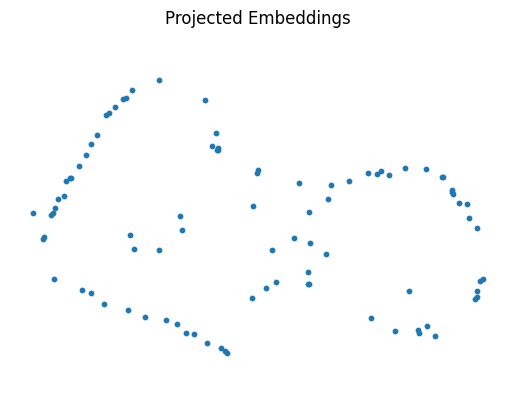

In [64]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

In [65]:
query = "Was there significant turnover in the executive team?"
results = index_microsoft.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

# for document in results['documents'][0]:
#     print(word_wrap(document))
#     print('')

In [66]:
retrieved_documents

['89   \nDIRECTORS AND EXECUTIVE OFFICERS OF MICROSOFT CORPORATION  \n  \nDIRECTORS  \n  \nSatya Nadella  \nChairman and Chief Executive Officer,  \nMicrosoft Corporation   Sandra E. Peterson 2,3 \nOperating Partner,  \nClayton, Dubilier  & Rice, LLC  John W. Stanton 1,4 \nFounder and Chairman, Trilogy \nPartnerships  \n      \nReid G. Hoffman 4 \nGeneral Partner, Greylock Partners  Penny S. Pritzker 4 \nFounder and Chairman,  \nPSP Partners, LLC  John W. Thompson 3,4 \nLead Independent Director,  \nMicrosoft Corporation  \n      \nHugh F. Johnston 1 \nVice Chairman and Executive Vice \nPresident and Chief Financial Officer, \nPepsiCo, Inc.  Carlos A. Rodriguez 1 \nChief Executive Officer, ADP, Inc.  Emma N. Walmsley 2,4 \nChief Executive Officer, GSK, plc  \n      \nTeri L. List 1,3 \nFormer Executive Vice President and \nChief Financial Officer, Gap, Inc.  Charles W. Scharf 2,3 \nChief Executive Officer and President, \nWells Fargo  & Company  Padmasree Warrior 2 \nFounder, President

In [67]:
query_embedding = openai_ef([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


(4.350490260124206, 12.872566056251525, 2.9073246121406555, 8.072857320308685)

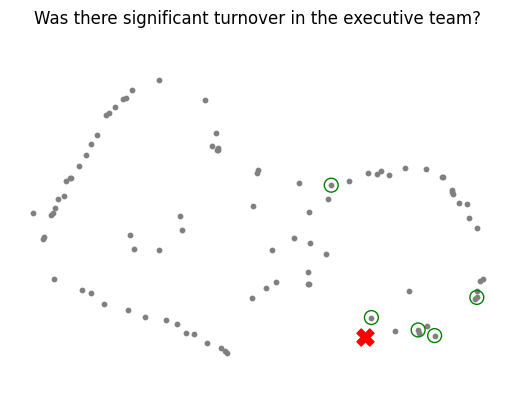

In [68]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [ ]:
Question="Was there significant turnover in the executive team?"

In [69]:
prompt=f"""You are helpful chatbot who provides an example answer based on the user question.
Question: {Question}
"""

In [70]:
from openai import OpenAI
client=OpenAI(api_key="")

response = client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=prompt,
    temperature=0,
    max_tokens=300
)

In [73]:
Example_input_answer=response.choices[0].text

In [74]:
query_user=Question +Example_input_answer

In [78]:
query = query_user
results = index_microsoft.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

# for document in results['documents'][0]:
#     print(word_wrap(document))
#     print('')

In [79]:
query_embedding = openai_ef([query])[0]
retrieved_embeddings = results['embeddings'][0]

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


(4.350490260124206, 12.872566056251525, 2.9073246121406555, 8.072857320308685)

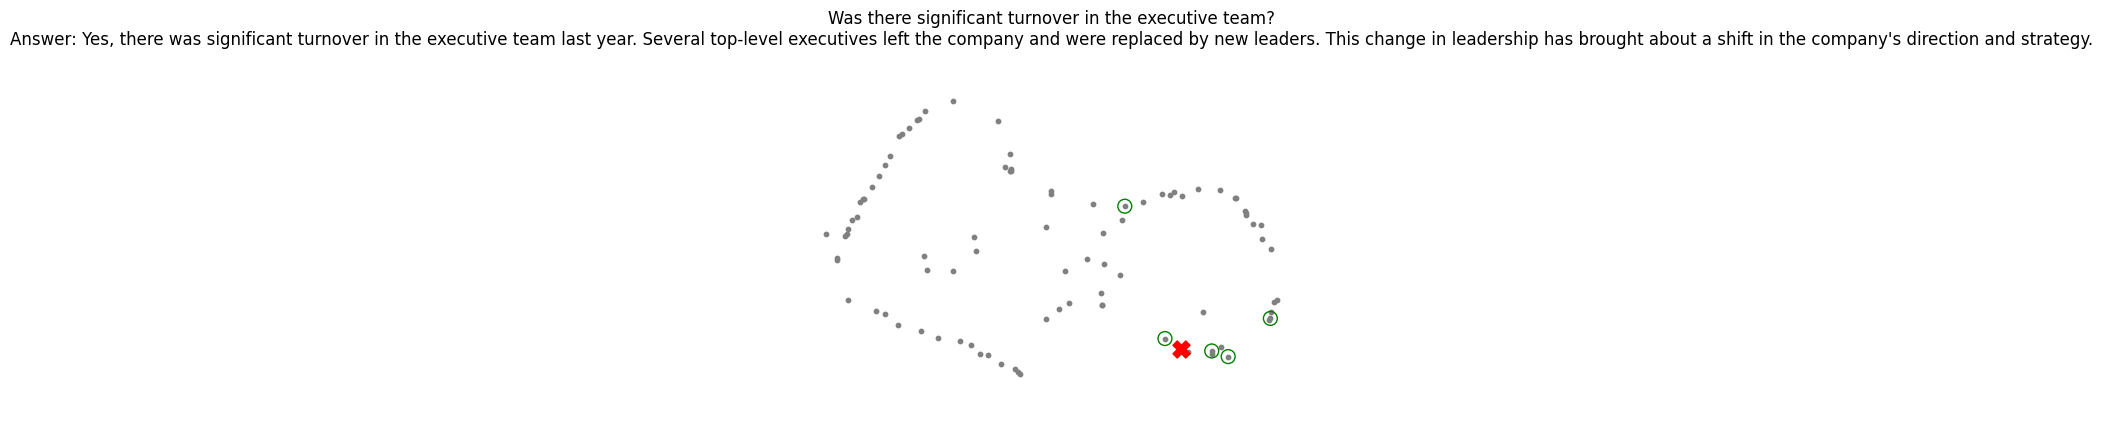

In [80]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')